In [1]:
### EP2MAC0417/MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP, #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO     #
# DESTE EP.                                                      #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,   #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM          #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                             #
#                                                                #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS        #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A          #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E        #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS    #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                           #
#                                                                #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO         #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR             #
# DESONESTIDADE ACADÊMICA.                                       #
#                                                                #
#                                                                #
# Nome: MARCUS VINICIUS FUGAGNOLI LARANJEIRA                     #
# NUSP: 5383459                                                  #
# Turma: MAC 0417/5768                                           #
# Prof.: Ronaldo Fumio Hashimoto                                 #
##################################################################

# EP 2 - Parte 1

Marcus Vinicius Fugagnoli Laranjeira - Número USP 5383459

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cv2 import imwrite

In [3]:
# Caminho para o subdiretório das imagens
subdir = "./imagens/"

In [4]:
metadados = pd.read_csv('metadados_completo.csv')

In [5]:
# Foi encontrado um erro no CSV metadados_completo.csv criado no EP1.
# Esta célula ajusta esse erro para que o notebook funcione adequadamente

metadados.loc[metadados['Nome Arquivo'] == '0120.png', 'Grupo'] = 1
metadados.loc[metadados['Nome Arquivo'] == '0240.png', 'Grupo'] = 2
metadados.loc[metadados['Nome Arquivo'] == '0360.png', 'Grupo'] = 3
metadados.loc[metadados['Nome Arquivo'] == '0480.png', 'Grupo'] = 4
metadados.loc[metadados['Nome Arquivo'] == '0600.png', 'Grupo'] = 5

## Parte 0: Requisitos do projeto

No EP1 havia redimencionado as imagens para 800x600. Vamos verificar se atendem os requisitos.

In [6]:
# Função para verificar se o arquivo é uma imagem
def is_image(arquivo):
    try:
        img = plt.imread(arquivo)
        return True
    except:
        return False

# Função para obter o tamanho dos arquivos
def get_image_sizes():
    tamanhos = []
    for nome_arquivo in metadados['Nome Arquivo']:
        caminho_imagem = os.path.join(subdir, nome_arquivo)
        if is_image(caminho_imagem):
            tamanhos.append(os.path.getsize(caminho_imagem))
    return tamanhos

# Função para calcular estatísticas
def calculate_statistics(tamanhos):
    tamanhos_array = np.array(tamanhos)
    max_size = np.max(tamanhos_array)
    min_size = np.min(tamanhos_array)
    mean_size = np.mean(tamanhos_array)
    median_size = np.median(tamanhos_array)
    return max_size, min_size, mean_size, median_size

# Função para converter bytes em kilobytes e megabytes
def format_size(size):
    kb = size / 1024
    mb = size / (1024 * 1024)
    return f"{size} bytes ({kb:.2f} KB, {mb:.2f} MB)"

# Calcular as estatísticas
tamanhos = get_image_sizes()
if tamanhos:
    max_size, min_size, mean_size, median_size = calculate_statistics(tamanhos)
    print(f"Quantidade de imagens: {len(tamanhos)}")
    print(f"Tamanho máximo: {format_size(max_size)}")
    print(f"Tamanho mínimo: {format_size(min_size)}")
    print(f"Tamanho médio: {format_size(int(mean_size))}")
    print(f"Tamanho mediano: {format_size(int(median_size))}")
else:
    print("Nenhuma imagem encontrada no diretório.")
 

Quantidade de imagens: 600
Tamanho máximo: 1232450 bytes (1203.56 KB, 1.18 MB)
Tamanho mínimo: 180582 bytes (176.35 KB, 0.17 MB)
Tamanho médio: 574744 bytes (561.27 KB, 0.55 MB)
Tamanho mediano: 471045 bytes (460.00 KB, 0.45 MB)


Entendo que as imagens com tamanho médio de 561.27KB, atendem os requisitos da Parte 0 deste EP, não sendo necessárias novas manipulações.

## Parte 1: Criar Funções e ```originalGrayDataset```

### Parte 1.1: Definição das Funções

#### Parte 1.1.1: Função RGB2gray

In [7]:
def RGB2gray(img):
    """
    Converte uma imagem RGB em uma imagem em tons de cinza.

    Parameters
    ----------
        img (numpy.ndarray): Uma imagem RGB.

    Returns
    -------
        numpy.ndarray: A imagem convertida em tons de cinza.
    """
    # Verificar se a imagem é uma matriz numpy
    if not isinstance(img, np.ndarray):
        raise TypeError("A imagem deve ser uma matriz numpy válida (np.ndarray).")
    
    # Verificar se a imagem tem 3 canais
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("A imagem deve ser uma imagem RGB válida, i.e., com 3 canais.")

    # Coeficientes para conversão de RGB para tons de cinza (convenção)
    rgb_gray = [0.2989, 0.5870, 0.1140]

    # Conversão para tons de cinza (cuidando para ignorar camadas adicionais desnecessárias)
    img_gray = np.dot(img[..., :3], rgb_gray)

    return img_gray

#### Parte 1.1.2: Função Contrast Stretching

In [8]:
def contrast_stretching(img, v_min = 0, v_max = 255):
    """
    Aplica técnica de Contrast Stretching que consiste em "espalhar" a distribuição das intensidades dos pixels de forma
    que os pixels não estejam concentrados num pequeno intervalo de intensidades, e sim em todo intervalo 0, 255
    
    Parameters
    ----------
        img (numpy.ndarray): Uma imagem em tons de cinza.

    Returns
    -------
        numpy.ndarray: A imagem com contraste espalhado em tons de cinza.
    """
    # Verificar se a imagem é uma matriz numpy
    if not isinstance(img, np.ndarray):
        raise TypeError("A imagem deve ser uma matriz numpy válida (np.ndarray).")
    
    # Verificar se a imagem tem apenas 1 canal
    try:
        isrgb = img_pb.shape[2] == 3
    except: 
        isrgb = False
    if img.ndim != 2 or isrgb:
        raise ValueError("A imagem deve ser uma imagem em tons de cinza válida, i.e., com apenas 1 canal.")
    
    if v_min < 0:
        raise ValueError("Valor mínimo não pode ser menor que zero.")
    if v_max <= v_min:
        raise ValueError("Valor máximo não pode ser menor ou igual ao valor mínimo.")
    
    r_min = np.min(img)
    r_max = np.max(img)
    stretched_img = ((img - r_min) / (r_max - r_min)) * (v_max - v_min) + v_min
    
    return stretched_img

#### Parte 1.1.3: Função Log

In [9]:
def log_transform(img, c = 1, v_min = 0, v_max = 255):
    """
    Aplica a transformação logarítmica a uma imagem.

    Parameters
    ----------
        img (numpy.ndarray): imagem em tons de cinza
        c (float): Constante de escala - maior que 0.

    Returns
    -------
        numpy.ndarray: A imagem transformada.
    """
    if c <= 0:
        raise ValueError("A constante c deve ser maior que 0.")

    # Verifica se a imagem é uma matriz numpy
    if not isinstance(img, np.ndarray):
        raise TypeError("A imagem deve ser uma matriz numpy válida (np.ndarray).")

    # Verifica se a imagem é em escala de cinza (2D)
    if img.ndim != 2:
        raise ValueError("A imagem deve ser uma imagem em tons de cinza válida, i.e., com apenas 1 canal.")

    # Aplica a transformação logarítmica
    img_log = c * np.log1p(img)

    return img_log

#### Parte 1.1.4: Função Exponencial

In [10]:
def exp_transform(img, c = 1, gamma = 1, epsilon = 0, v_min = 0, v_max = 255):
    """
    Aplica a transformação exponencial a uma imagem.

    Parameters
    ----------
        img (numpy.ndarray): Uma imagem em tons de cinza.
        c (float): Constante de escala - maior que 0.
        gamma (float): Constante Exponencial.
        epislon (float): Constante de Imagem.

    Returns
    -------
        numpy.ndarray: A imagem transformada.
    """
    if c <= 0:
        raise ValueError("A constante c deve ser maior que 0.")

    # Verifica se a imagem é uma matriz numpy
    if not isinstance(img, np.ndarray):
        raise TypeError("A imagem deve ser uma matriz numpy válida (np.ndarray).")

    # Verifica se a imagem é em escala de cinza (2D)
    if img.ndim != 2:
        raise ValueError("A imagem deve ser uma imagem em tons de cinza válida, i.e., com apenas 1 canal.")

    # Aplica a transformação exponencial
    img_exp = c * (epsilon + img) ** gamma

    return img_exp

#### Parte 1.1.5: Função Genérica - Filtro com Kernel

Defino uma função genérica que será usada em seguida para outras duas funções

In [11]:
def apply_filter(img, kernel):
    """
    Aplica um filtro especificado por um kernel à uma imagem.
    
    Parameters
    ----------
        img (numpy.ndarray): Uma imagem em tons de cinza.
        kernel (numpy.ndarray): O kernel do filtro.

    Returns
    -------
        numpy.ndarray: A imagem transformada.
    """
    
    # Verifica se a imagem é uma matriz numpy
    if not isinstance(img, np.ndarray):
        raise TypeError("A imagem deve ser uma matriz numpy válida (np.ndarray).")

    # Verifica se a imagem é em escala de cinza (2D)
    if img.ndim != 2:
        raise ValueError("A imagem deve ser uma imagem em tons de cinza válida, i.e., com apenas 1 canal.")

    # Verifica se o kernel é uma matriz numpy
    if not isinstance(kernel, np.ndarray):
        raise TypeError("O kernel deve ser uma matriz numpy válida (np.ndarray).")
        
    # Verifica se a soma do kernel é zero (laplaciano) ou um (média/suavização)
    if np.sum(kernel) != 0 and np.sum(kernel) != 1:
        raise TypeError("O kernel deve ter soma 0 (Laplaciano) ou 1 (suavização).")

    # Obter as dimensões da imagem e do kernel
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape

    # Zero Padding da imagem
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode = 'constant')

    # Inicializar a imagem filtrada
    filtered_img = np.zeros_like(img)

    # Aplicar a convolução
    for i in range(img_height):
        for j in range(img_width):
            # Extrair a região da imagem que corresponde ao kernel
            region = padded_img[i:i + kernel_height, j:j + kernel_width]
            # Aplicar o kernel à região
            filtered_img[i, j] = np.sum(region * kernel)

    return filtered_img

#### Parte 1.1.6: Função Laplaciano da Imagem

O kernel Laplaciano utilizado será:

\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}


In [12]:
def laplacian_img(img, kernel = np.array([[1,  1,  1],
                                          [1, -8 , 1],
                                          [1,  1,  1]])):
    return apply_filter(img, kernel)

#### Parte 1.1.7: Função Suavização 

O kernel de suavização utilizado será:

$$ \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

In [13]:
def mean_img(img, kernel = np.array([[1/9, 1/9, 1/9],
                                     [1/9, 1/9, 1/9],
                                     [1/9, 1/9, 1/9]])):
    return apply_filter(img, kernel)

#### Parte 1.1.8: Testes das Funções

Abaixo há testes de funcionamento das funções, com seus parâmetros padrão, sem nenhuma intensão de tratamento da imagem escolhida para os testes (0001.png), apenas verificar se estão atendendo aos requisitos.

In [14]:
# Para os testes, utilizamos a imagem 0001 do dataset original
img = plt.imread(subdir + '0001.png')

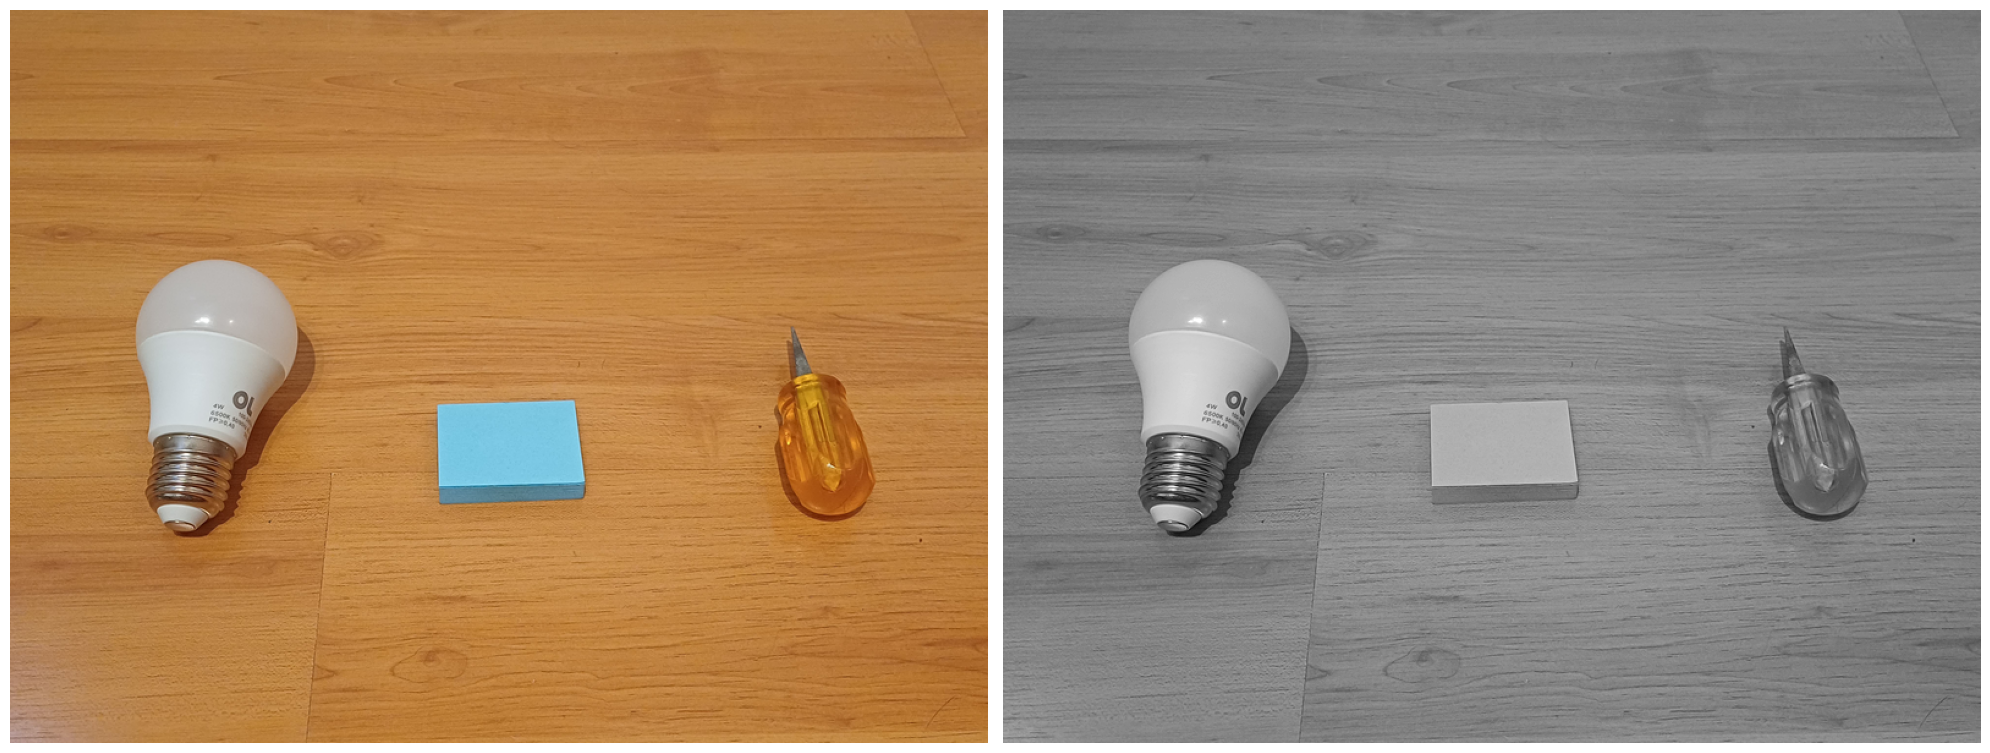

In [15]:
# Função RGB2gray

# imread do plt carrega as imagens com intensidades entre 0 e 1
img_pb = RGB2gray(img) * 255

fig, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].imshow(img)
axes[0].axis("off")
axes[1].imshow(img_pb, cmap="gray")
axes[1].axis("off")
plt.tight_layout()
plt.show()

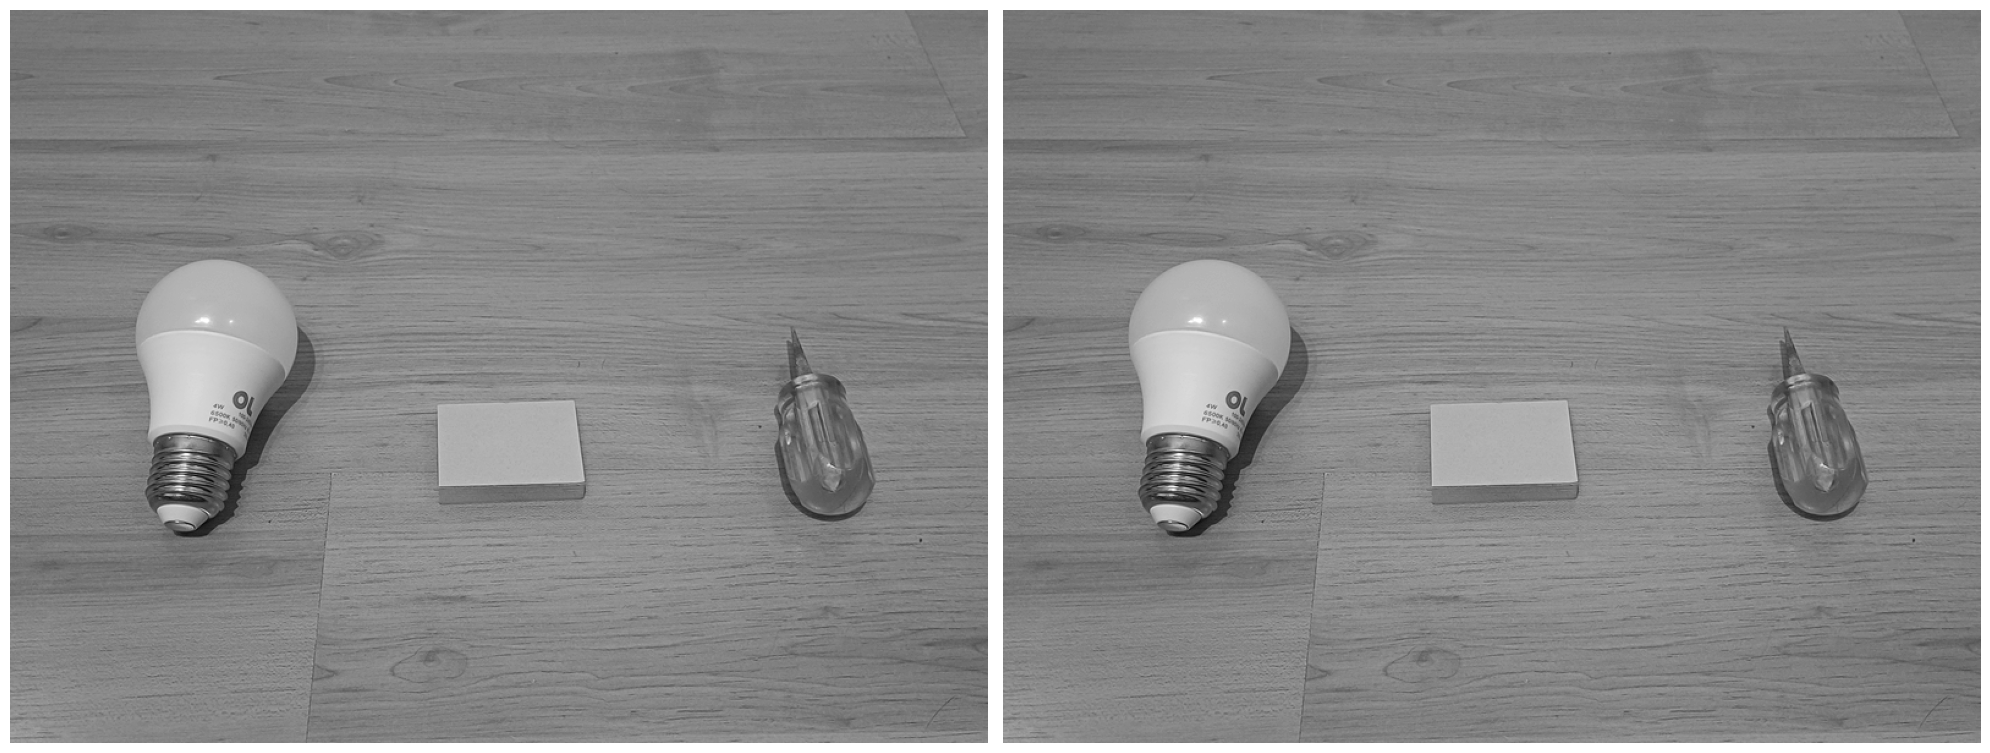

In [16]:
# Função contrast_stretching
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].imshow(img_pb, cmap="gray")
axes[0].axis("off")
axes[1].imshow(contrast_stretching(img_pb), cmap="gray", vmin=0, vmax=255)
axes[1].axis("off")
plt.tight_layout()
plt.show()

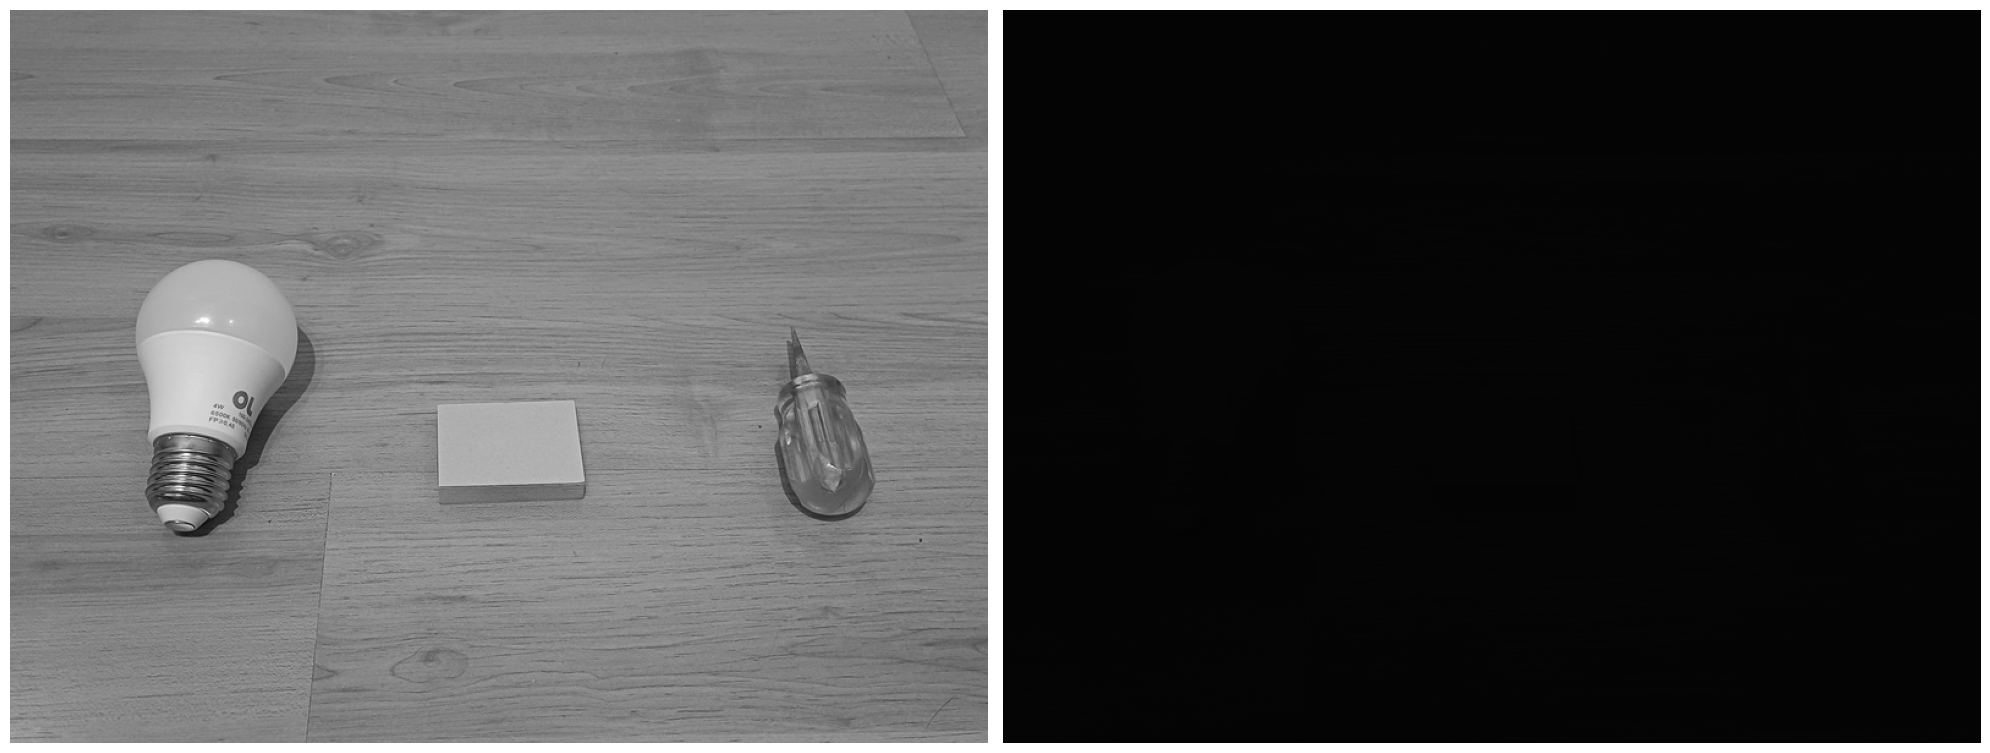

In [17]:
# Função log_transform
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].imshow(img_pb, cmap="gray")
axes[0].axis("off")
axes[1].imshow(log_transform(img_pb), cmap="gray", vmin=0, vmax=255)
axes[1].axis("off")
plt.tight_layout()
plt.show()

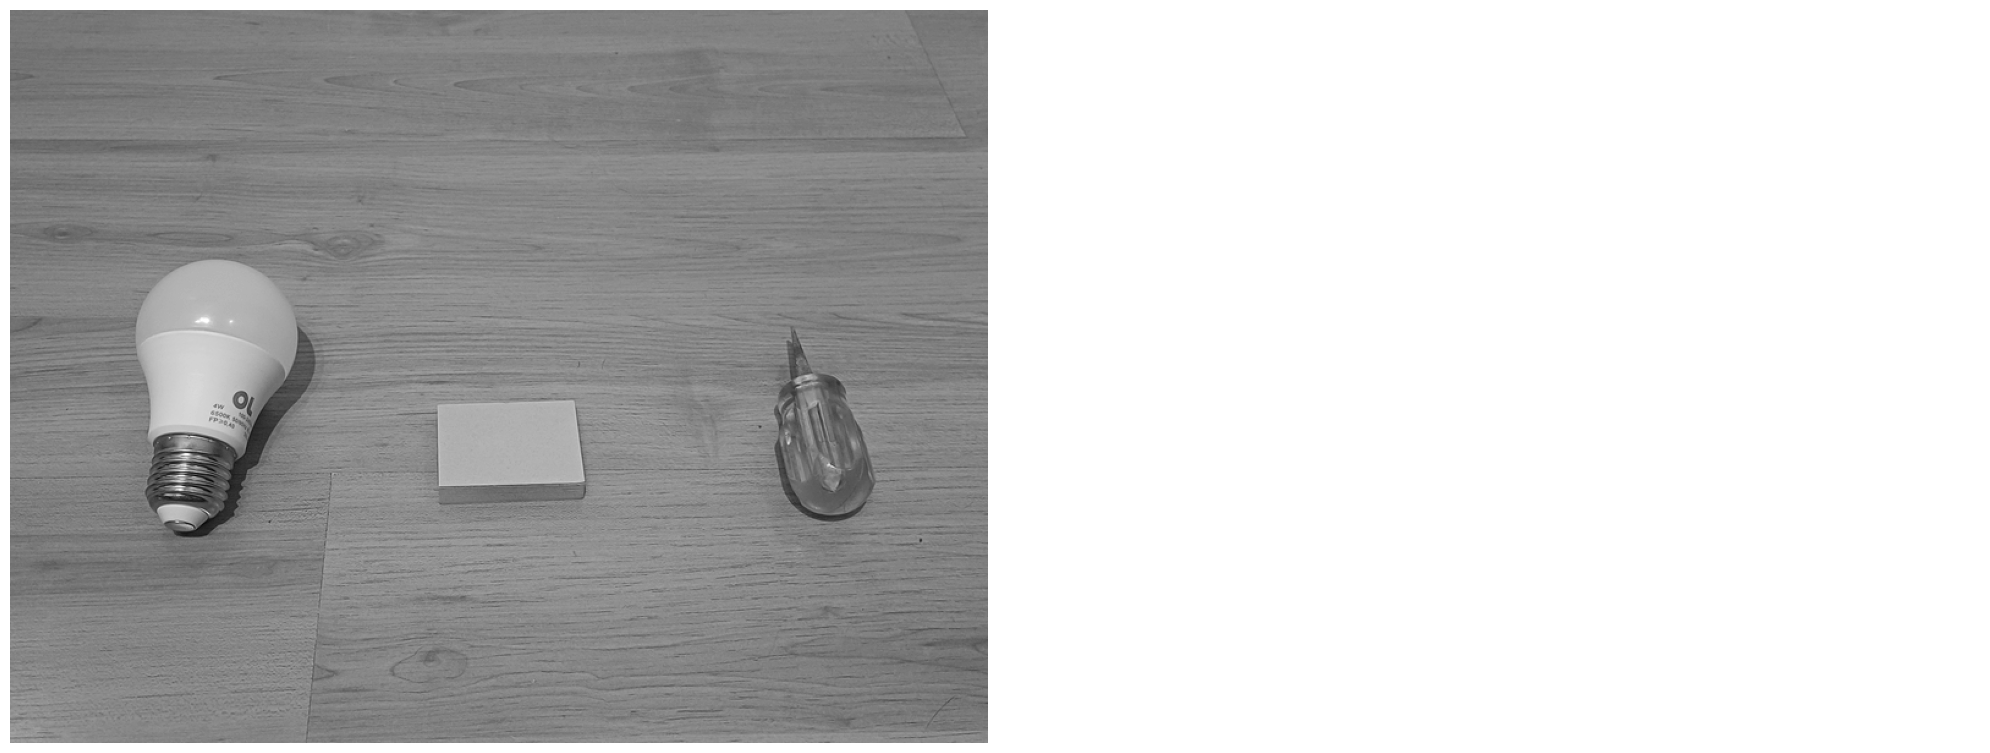

In [18]:
# Função exp_transform
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].imshow(img_pb, cmap="gray")
axes[0].axis("off")
axes[1].imshow(exp_transform(img_pb, c = 2, epsilon = 1, gamma = 15), cmap="gray", vmin=0, vmax=255)
axes[1].axis("off")
plt.tight_layout()
plt.show()

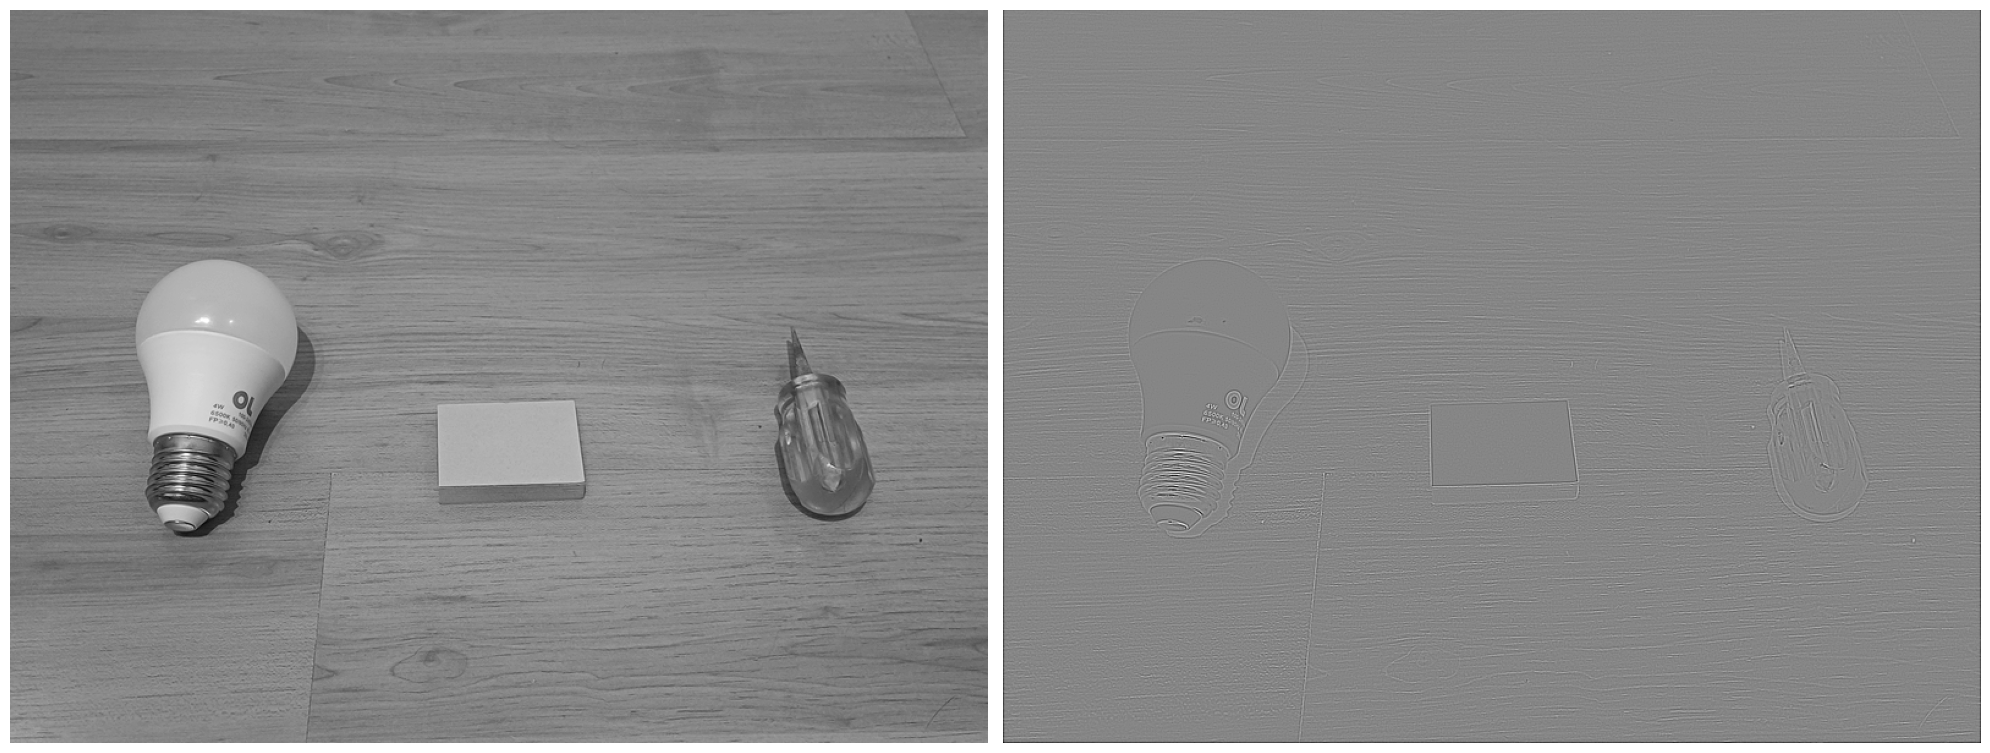

In [19]:
# Função laplacian_img
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].imshow(img_pb, cmap="gray")
axes[0].axis("off")
axes[1].imshow(laplacian_img(img_pb), cmap="gray")
axes[1].axis("off")
plt.tight_layout()
plt.show()

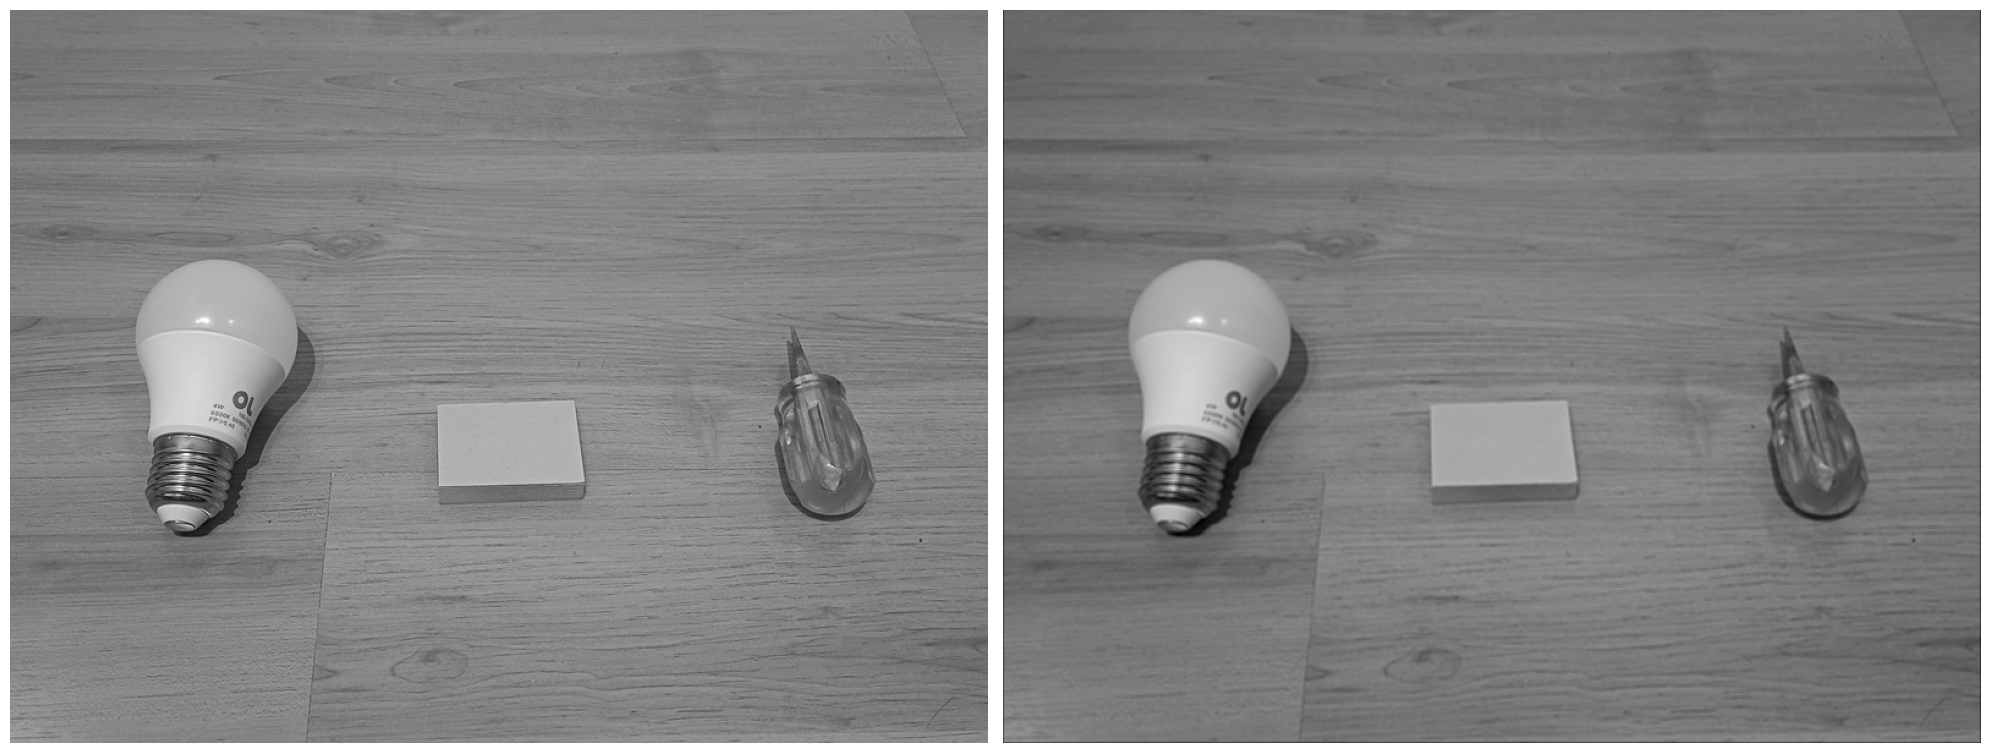

In [20]:
# Função mean_img
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].imshow(img_pb, cmap="gray")
axes[0].axis("off")
axes[1].imshow(mean_img(img_pb), cmap="gray")
axes[1].axis("off")
plt.tight_layout()
plt.show()

### Parte 1.2: Criação do Dataset ```originalGrayDataset```

#### Parte 1.2.1: Criação do diretório ```originalGrayDataset```

In [21]:
ogd_dir = './originalGrayDataset/'

def limpa_dir(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Remove o arquivo/link
            elif os.path.isdir(file_path):
                # Deletar o conteúdo (recursivo)
                for root, dirs, files in os.walk(file_path, topdown = False):
                    for name in files:
                        os.remove(os.path.join(root, name))
                    for name in dirs:
                        os.rmdir(os.path.join(root, name))
                os.rmdir(file_path)
        except Exception as e:
            print(f'Erro ao deletar {file_path}. Motivo: {e}')

# Verifica se o diretório existe
if os.path.exists(ogd_dir):
    # Se o diretório existir, deletar todo o conteúdo dele
    limpa_dir(ogd_dir)
    print(f'Diretório {ogd_dir} já existia e seu conteúdo foi apagado com sucesso.')
else:
    # Se o diretório não existir, crio o diretório
    os.makedirs(ogd_dir)
    print(f'Diretório {ogd_dir} criado com sucesso.')


Diretório ./originalGrayDataset/ já existia e seu conteúdo foi apagado com sucesso.


#### Parte 1.2.2: Criação das imagens do ```originalGrayDataset```

In [22]:
for arquivo in metadados['Nome Arquivo']:
    img = plt.imread(subdir + arquivo)
    # imread do plt carrega as imagens com intensidades entre 0 e 1
    img_pb = RGB2gray(img * 255)
    imwrite("./" + ogd_dir + "/" + arquivo, img_pb)

### Parte 1.3 Criação do ```augmentedDataset```

#### Parte 1.3.1 Criação da estrutura de diretórios do ```augmentedDataset```

In [23]:
diretorios = ['./augmentedDataset/', './augmentedDataset/contrast_stretching/',
              './augmentedDataset/log_transform/', './augmentedDataset/exp_transform/',
              './augmentedDataset/laplacian_img/', './augmentedDataset/mean_img/']

for diretorio in diretorios:
    # Verifica se o diretório existe
    if os.path.exists(diretorio):
        # Se o diretório existir, deleto todo o conteúdo dele
        limpa_dir(diretorio)
        print(f'Diretório {diretorio} já existia e seu conteúdo foi apagado com sucesso.')
    else:
        # Se o diretório não existir, crio o diretório
        os.makedirs(diretorio)
        print(f'Diretório {diretorio} criado com sucesso.')

Diretório ./augmentedDataset/ já existia e seu conteúdo foi apagado com sucesso.
Diretório ./augmentedDataset/contrast_stretching/ criado com sucesso.
Diretório ./augmentedDataset/log_transform/ criado com sucesso.
Diretório ./augmentedDataset/exp_transform/ criado com sucesso.
Diretório ./augmentedDataset/laplacian_img/ criado com sucesso.
Diretório ./augmentedDataset/mean_img/ criado com sucesso.


#### Parte 1.3.2 Criação das Imagens para cada um dos Tratamentos

In [24]:
tratamentos = {
    'Contrast Stretching': {'diretorio': 'contrast_stretching',
                            'funcao': contrast_stretching,
                            'parametros': [{}, {}, {}, {}, {}]},
    'Logarítimo': {'diretorio': 'log_transform',
                   'funcao': log_transform, 
                   'parametros': [{'c': 26.5}, 
                                  {'c': 27}, 
                                  {'c': 24.4}, 
                                  {'c': 43.6}, 
                                  {'c': 23.1}]},
    'Exponencial': {'diretorio': 'exp_transform', 
                    'funcao': exp_transform,
                    'parametros': [{'gamma': 0.99}, 
                                   {'gamma': 1.02}, 
                                   {'gamma': 0.98, 'epsilon': 10}, 
                                   {'gamma': 1.34},
                                   {'gamma': 0.85, 'epsilon': 16}]},
    'Laplaciano': {'diretorio': 'laplacian_img',
                   'funcao': laplacian_img,
                   'parametros': [{}, {}, {}, {}, {}]},
    'Suavização/Média': {'diretorio': 'mean_img', 
                         'funcao': mean_img,
                         'parametros': [{}, {}, {}, {}, {}]},
}

In [25]:
ads = './augmentedDataset/'

for grupo in metadados['Grupo'].unique():
    print(f'\n\nGRUPO: {grupo}')
    for arquivo in metadados[metadados['Grupo'] == grupo]['Nome Arquivo']:
        try:
            print(f'\nGRUPO {grupo} / ARQUIVO: {arquivo}\n')
            imagem = plt.imread(ogd_dir + arquivo) * 255
            for tratamento in tratamentos:
                try:
                    print(f'Tratamento: {tratamento}')
                    img_transformada = tratamentos[tratamento]['funcao'](imagem, **tratamentos[tratamento]['parametros'][grupo-1])
                    arquivo_transformado = os.path.join(ads, tratamentos[tratamento]['diretorio'], arquivo)
                    if imwrite(arquivo_transformado, img_transformada):
                        print(f'Imagem salva em: {arquivo_transformado}')
                    else:
                        print(f'Erro ao salvar a imagem: {arquivo_transformado}')
                except Exception as e:
                    print(f'Erro ao aplicar {tratamentos[tratamento]} na imagem {arquivo}: {e}')
        except Exception as e:
            print(f'Erro ao carregar a imagem {arquivo}: {e}')



GRUPO: 1

GRUPO 1 / ARQUIVO: 0001.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0001.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0001.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0001.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0001.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0001.png

GRUPO 1 / ARQUIVO: 0002.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0002.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0002.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0002.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0002.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0002.png

GRUPO 1 / ARQUIVO: 0003.png

Tratamento: Contrast Stretching
Imagem salva 

Imagem salva em: ./augmentedDataset/laplacian_img\0019.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0019.png

GRUPO 1 / ARQUIVO: 0020.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0020.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0020.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0020.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0020.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0020.png

GRUPO 1 / ARQUIVO: 0021.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0021.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0021.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0021.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0021.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0037.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0037.png

GRUPO 1 / ARQUIVO: 0038.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0038.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0038.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0038.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0038.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0038.png

GRUPO 1 / ARQUIVO: 0039.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0039.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0039.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0039.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0039.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0055.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0055.png

GRUPO 1 / ARQUIVO: 0056.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0056.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0056.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0056.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0056.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0056.png

GRUPO 1 / ARQUIVO: 0057.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0057.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0057.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0057.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0057.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0073.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0073.png

GRUPO 1 / ARQUIVO: 0074.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0074.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0074.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0074.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0074.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0074.png

GRUPO 1 / ARQUIVO: 0075.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0075.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0075.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0075.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0075.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0091.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0091.png

GRUPO 1 / ARQUIVO: 0092.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0092.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0092.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0092.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0092.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0092.png

GRUPO 1 / ARQUIVO: 0093.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0093.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0093.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0093.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0093.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0109.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0109.png

GRUPO 1 / ARQUIVO: 0110.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0110.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0110.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0110.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0110.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0110.png

GRUPO 1 / ARQUIVO: 0111.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0111.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0111.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0111.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0111.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0127.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0127.png

GRUPO 2 / ARQUIVO: 0128.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0128.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0128.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0128.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0128.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0128.png

GRUPO 2 / ARQUIVO: 0129.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0129.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0129.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0129.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0129.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0145.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0145.png

GRUPO 2 / ARQUIVO: 0146.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0146.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0146.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0146.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0146.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0146.png

GRUPO 2 / ARQUIVO: 0147.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0147.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0147.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0147.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0147.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0163.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0163.png

GRUPO 2 / ARQUIVO: 0164.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0164.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0164.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0164.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0164.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0164.png

GRUPO 2 / ARQUIVO: 0165.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0165.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0165.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0165.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0165.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0181.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0181.png

GRUPO 2 / ARQUIVO: 0182.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0182.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0182.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0182.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0182.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0182.png

GRUPO 2 / ARQUIVO: 0183.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0183.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0183.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0183.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0183.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0199.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0199.png

GRUPO 2 / ARQUIVO: 0200.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0200.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0200.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0200.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0200.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0200.png

GRUPO 2 / ARQUIVO: 0201.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0201.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0201.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0201.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0201.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0217.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0217.png

GRUPO 2 / ARQUIVO: 0218.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0218.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0218.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0218.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0218.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0218.png

GRUPO 2 / ARQUIVO: 0219.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0219.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0219.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0219.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0219.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0235.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0235.png

GRUPO 2 / ARQUIVO: 0236.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0236.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0236.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0236.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0236.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0236.png

GRUPO 2 / ARQUIVO: 0237.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0237.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0237.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0237.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0237.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0253.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0253.png

GRUPO 3 / ARQUIVO: 0254.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0254.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0254.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0254.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0254.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0254.png

GRUPO 3 / ARQUIVO: 0255.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0255.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0255.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0255.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0255.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0271.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0271.png

GRUPO 3 / ARQUIVO: 0272.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0272.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0272.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0272.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0272.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0272.png

GRUPO 3 / ARQUIVO: 0273.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0273.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0273.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0273.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0273.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0289.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0289.png

GRUPO 3 / ARQUIVO: 0290.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0290.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0290.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0290.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0290.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0290.png

GRUPO 3 / ARQUIVO: 0291.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0291.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0291.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0291.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0291.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0307.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0307.png

GRUPO 3 / ARQUIVO: 0308.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0308.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0308.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0308.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0308.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0308.png

GRUPO 3 / ARQUIVO: 0309.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0309.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0309.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0309.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0309.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0325.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0325.png

GRUPO 3 / ARQUIVO: 0326.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0326.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0326.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0326.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0326.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0326.png

GRUPO 3 / ARQUIVO: 0327.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0327.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0327.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0327.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0327.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0343.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0343.png

GRUPO 3 / ARQUIVO: 0344.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0344.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0344.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0344.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0344.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0344.png

GRUPO 3 / ARQUIVO: 0345.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0345.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0345.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0345.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0345.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0361.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0361.png

GRUPO 4 / ARQUIVO: 0362.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0362.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0362.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0362.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0362.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0362.png

GRUPO 4 / ARQUIVO: 0363.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0363.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0363.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0363.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0363.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0379.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0379.png

GRUPO 4 / ARQUIVO: 0380.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0380.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0380.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0380.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0380.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0380.png

GRUPO 4 / ARQUIVO: 0381.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0381.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0381.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0381.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0381.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0397.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0397.png

GRUPO 4 / ARQUIVO: 0398.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0398.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0398.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0398.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0398.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0398.png

GRUPO 4 / ARQUIVO: 0399.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0399.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0399.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0399.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0399.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0415.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0415.png

GRUPO 4 / ARQUIVO: 0416.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0416.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0416.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0416.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0416.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0416.png

GRUPO 4 / ARQUIVO: 0417.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0417.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0417.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0417.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0417.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0433.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0433.png

GRUPO 4 / ARQUIVO: 0434.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0434.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0434.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0434.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0434.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0434.png

GRUPO 4 / ARQUIVO: 0435.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0435.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0435.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0435.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0435.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0451.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0451.png

GRUPO 4 / ARQUIVO: 0452.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0452.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0452.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0452.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0452.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0452.png

GRUPO 4 / ARQUIVO: 0453.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0453.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0453.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0453.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0453.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0469.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0469.png

GRUPO 4 / ARQUIVO: 0470.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0470.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0470.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0470.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0470.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0470.png

GRUPO 4 / ARQUIVO: 0471.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0471.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0471.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0471.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0471.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0487.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0487.png

GRUPO 5 / ARQUIVO: 0488.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0488.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0488.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0488.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0488.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0488.png

GRUPO 5 / ARQUIVO: 0489.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0489.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0489.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0489.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0489.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0505.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0505.png

GRUPO 5 / ARQUIVO: 0506.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0506.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0506.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0506.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0506.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0506.png

GRUPO 5 / ARQUIVO: 0507.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0507.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0507.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0507.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0507.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0523.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0523.png

GRUPO 5 / ARQUIVO: 0524.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0524.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0524.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0524.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0524.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0524.png

GRUPO 5 / ARQUIVO: 0525.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0525.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0525.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0525.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0525.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0541.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0541.png

GRUPO 5 / ARQUIVO: 0542.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0542.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0542.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0542.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0542.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0542.png

GRUPO 5 / ARQUIVO: 0543.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0543.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0543.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0543.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0543.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0559.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0559.png

GRUPO 5 / ARQUIVO: 0560.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0560.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0560.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0560.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0560.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0560.png

GRUPO 5 / ARQUIVO: 0561.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0561.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0561.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0561.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0561.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0577.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0577.png

GRUPO 5 / ARQUIVO: 0578.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0578.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0578.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0578.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0578.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0578.png

GRUPO 5 / ARQUIVO: 0579.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0579.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0579.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0579.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0579.png
Tratamento: Suavização/Médi

Imagem salva em: ./augmentedDataset/laplacian_img\0595.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0595.png

GRUPO 5 / ARQUIVO: 0596.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0596.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0596.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0596.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0596.png
Tratamento: Suavização/Média
Imagem salva em: ./augmentedDataset/mean_img\0596.png

GRUPO 5 / ARQUIVO: 0597.png

Tratamento: Contrast Stretching
Imagem salva em: ./augmentedDataset/contrast_stretching\0597.png
Tratamento: Logarítimo
Imagem salva em: ./augmentedDataset/log_transform\0597.png
Tratamento: Exponencial
Imagem salva em: ./augmentedDataset/exp_transform\0597.png
Tratamento: Laplaciano
Imagem salva em: ./augmentedDataset/laplacian_img\0597.png
Tratamento: Suavização/Médi

### FIM PARTE EP2 - Parte 1

<hr style="border: 0; border-top: 10px solid black; width: 85%; margin: 0 auto;">